In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.shape

(1599, 12)

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

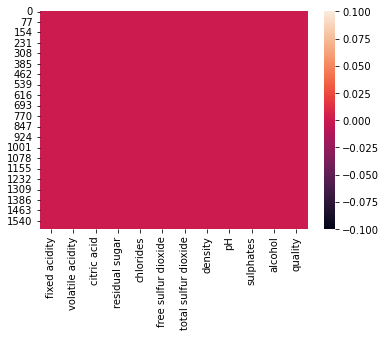

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.duplicated().sum()

240

In [8]:
((1599-1359)/1599)*100


15.0093808630394

In [9]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [10]:
df['quality']=[1 if i>=7 else 0 for i in df['quality']]

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [12]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,0


# EDA

In [13]:
numerical_feature=[i for i in df.columns if df[i].dtypes=='float64']
numerical_feature

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [14]:
descrete_feature=[i for i in numerical_feature if len(df[i].unique())<25]
descrete_feature

[]

Text(0.5, 1.0, 'According to quality rating No.of quantity wines')

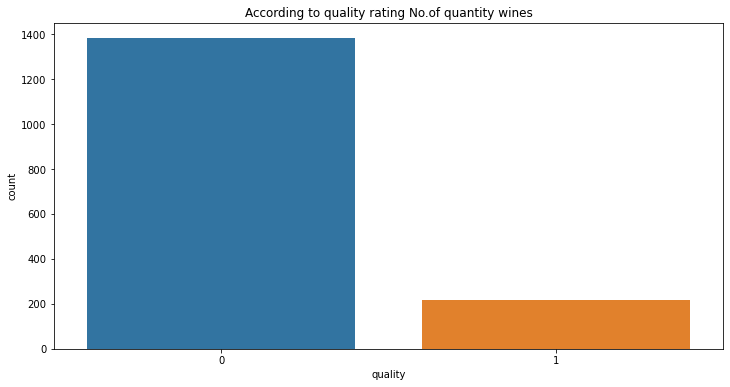

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(df['quality'])
plt.title('According to quality rating No.of quantity wines')

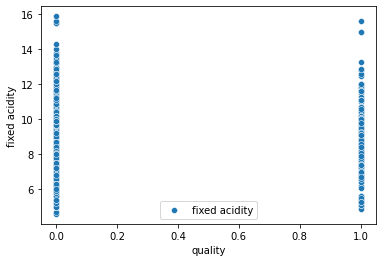

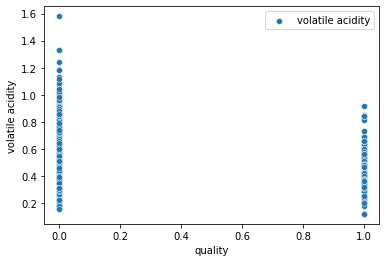

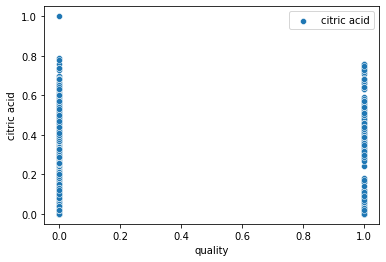

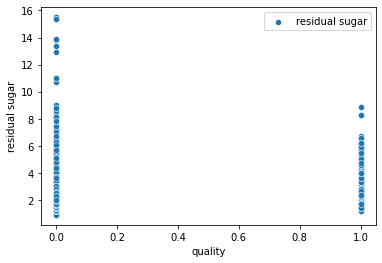

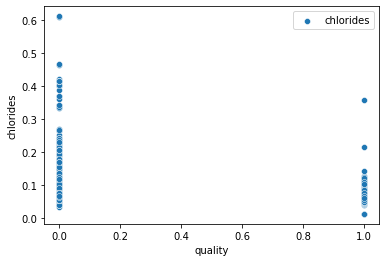

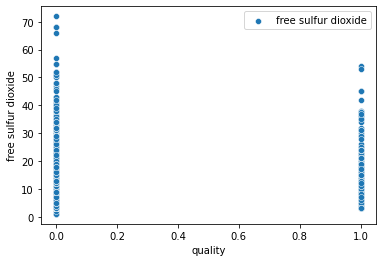

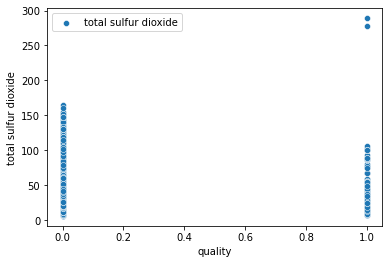

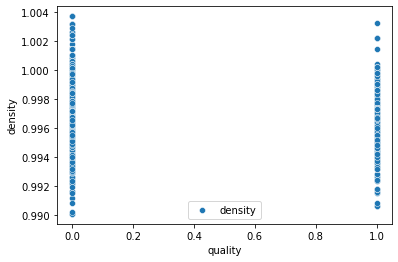

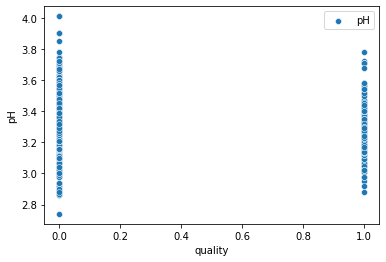

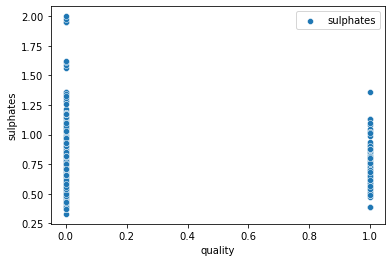

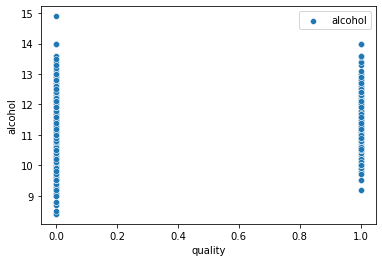

In [16]:
for i in numerical_feature:
    df1=df.copy()
    plt.figure()
    sns.scatterplot(df1['quality'],df1[i],label=i)
    plt.legend()
    

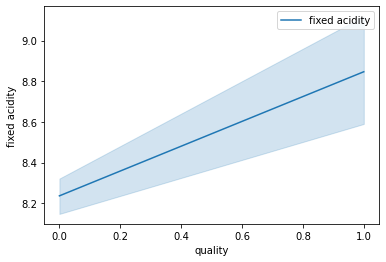

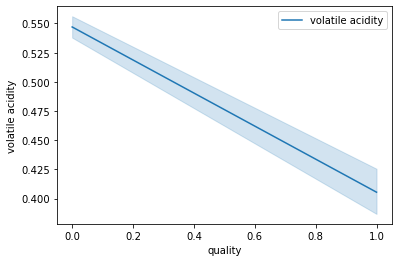

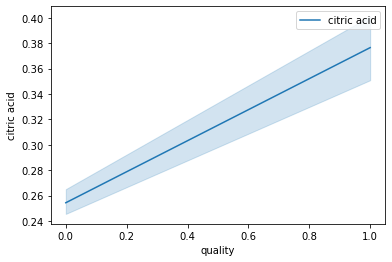

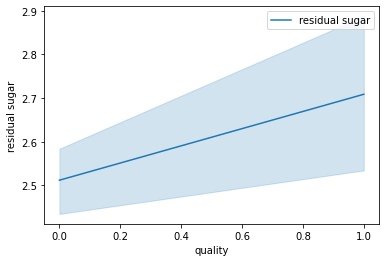

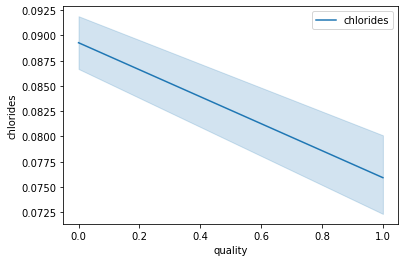

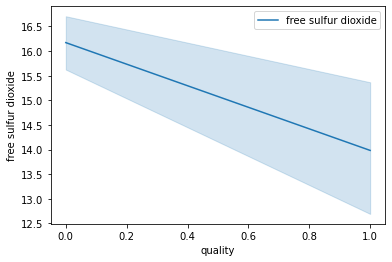

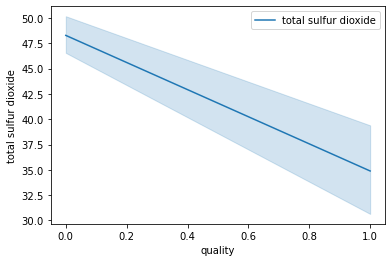

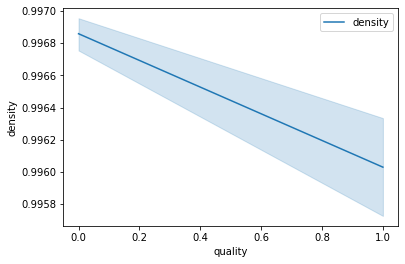

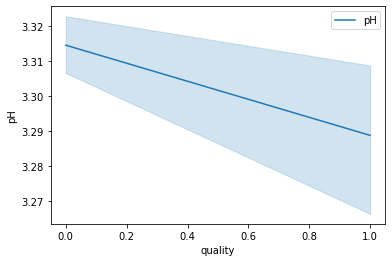

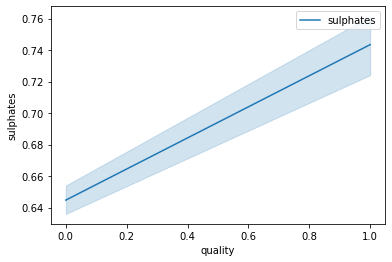

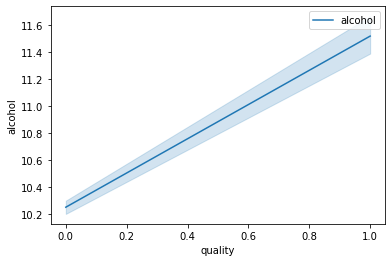

In [17]:
for i in numerical_feature:
    df1=df.copy()
    plt.figure()
    sns.lineplot(df1['quality'],df1[i],label=i)
    plt.legend()

from the line graph volatile acidity,chloride,free sulfur dioxide,total sulfur dioxide,density,pH will reduce wine quality


alcohol,sulphate,residual sugar,citric acid,fixed acidity will improved quality

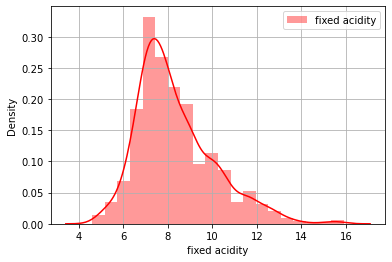

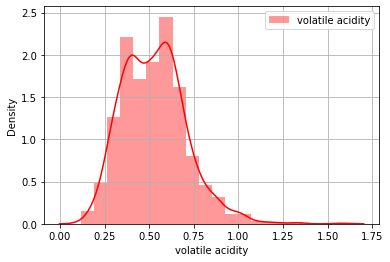

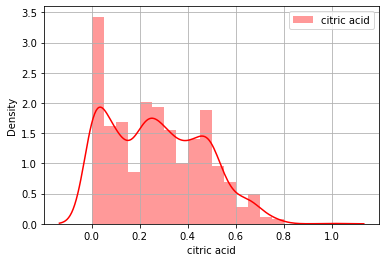

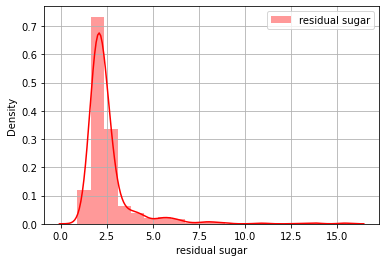

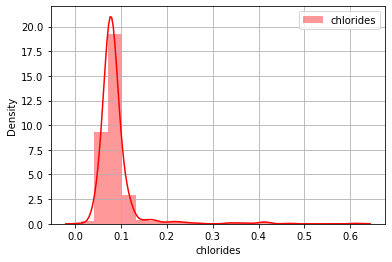

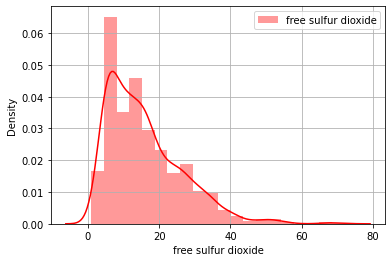

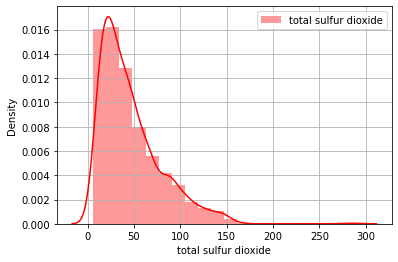

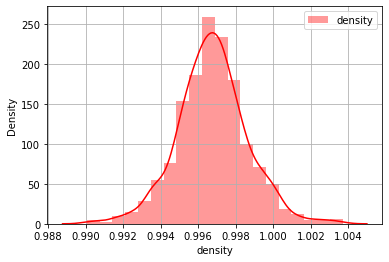

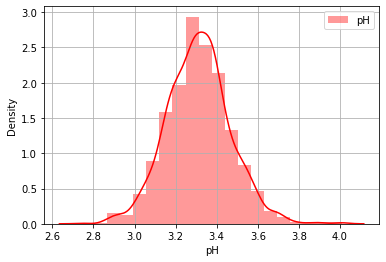

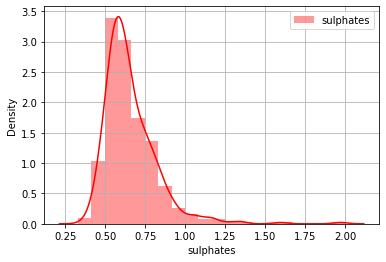

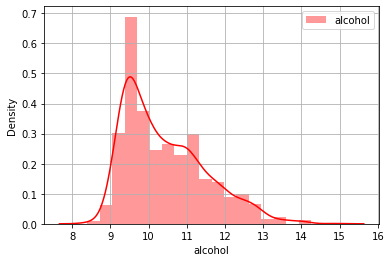

In [18]:
for i in numerical_feature:
    df1=df.copy()
    plt.figure()
    sns.distplot(df1[i],color='r',label=i,bins=20)
    plt.grid()
    plt.legend(loc='upper right')
    

from distribution curve density,chloride,free sulfur dioxide,total sulfur dioxide,sulphate have right skew

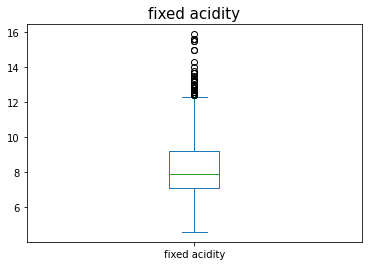

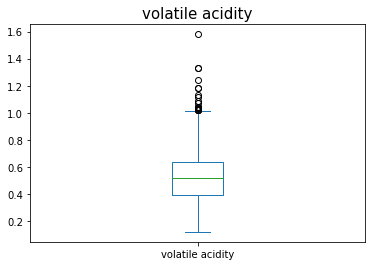

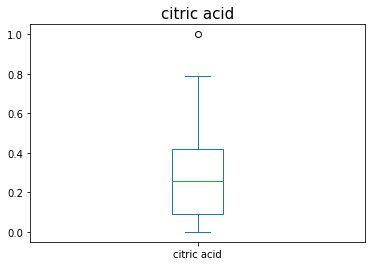

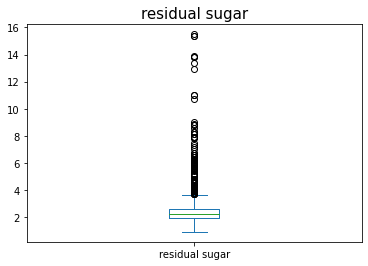

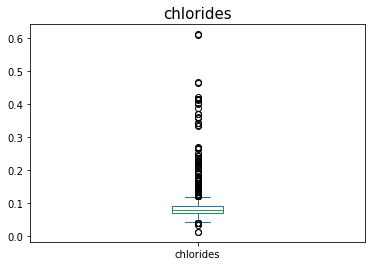

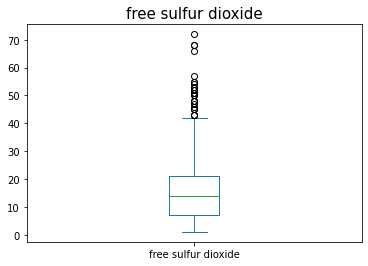

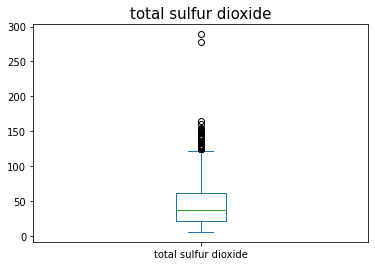

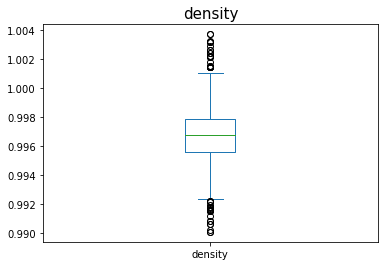

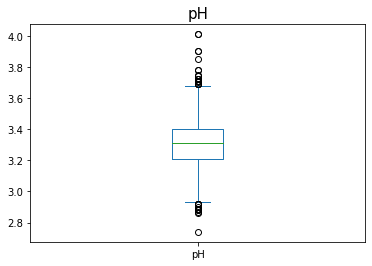

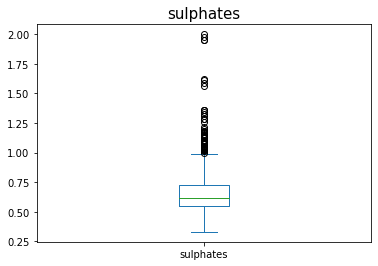

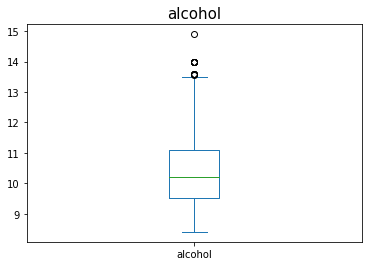

In [19]:
for i in numerical_feature:
    df1=df.copy()
    plt.figure()
    df[i].plot.box()
    plt.title(i,fontsize=15)

from the boxplot residual sugar,chloride,free sulfur dioxide,total sulfur dioxide,sulphate have more outliers

<AxesSubplot:xlabel='quality'>

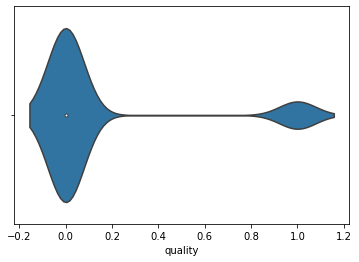

In [20]:
sns.violinplot(df['quality'],data=df)

In [21]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


<AxesSubplot:>

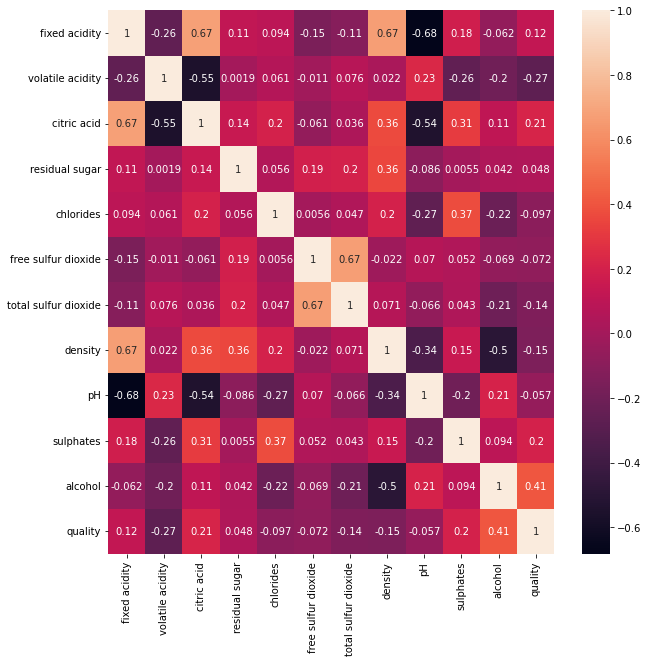

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

from the observation volatile acidity negatively affect in quality as well citric acid we drop that column

<AxesSubplot:xlabel='volatile acidity', ylabel='citric acid'>

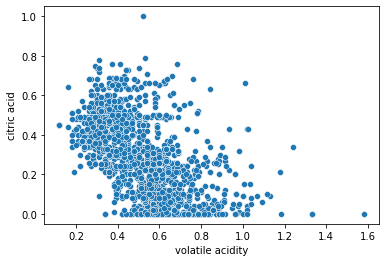

In [23]:
sns.scatterplot(df['volatile acidity'],df['citric acid'],data=df)

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

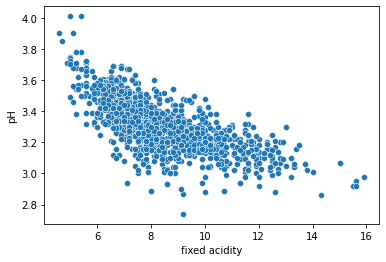

In [24]:
sns.scatterplot(df['fixed acidity'],df['pH'],data=df)

In [25]:
df=df.drop(['volatile acidity'],axis=1)

In [26]:
df.describe()

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [27]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [28]:
df.skew()

fixed acidity           0.982751
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

# Check VIF

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
def vifcal():
    vif=pd.DataFrame()
    vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['columns']=x.columns
    print(vif)

In [31]:
vifcal()

           vif               columns
0    70.255473         fixed acidity
1     6.519083           citric acid
2     4.642636        residual sugar
3     6.046994             chlorides
4     6.238337   free sulfur dioxide
5     6.187421  total sulfur dioxide
6  1479.193049               density
7  1056.134345                    pH
8    20.852772             sulphates
9   124.290144               alcohol


we can saw that 'Density' column from vif score and correlation with quality AS negative corelate

# Remove outliers

In [32]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [33]:
thresold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   42,   43,   45,
         57,   81,   81,   83,   86,   88,   91,   92,   95,  106,  106,
        109,  142,  144,  147,  151,  151,  151,  151,  163,  164,  169,
        169,  181,  226,  226,  240,  243,  244,  258,  258,  274,  281,
        291,  324,  325,  339,  340,  347,  354,  374,  381,  391,  396,
        396,  400,  400,  442,  442,  451,  467,  480,  480,  494,  515,
        544,  554,  554,  555,  555,  557,  557,  568,  584,  588,  591,
        595,  608,  614,  636,  639,  649,  649,  651,  652,  652,  652,
        672,  684,  692,  692,  695,  723,  730,  754,  776,  777,  795,
        821,  836,  837,  889,  911,  917,  923,  925,  926,  982, 1017,
       1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111,
       1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244,
       1260, 1269, 1269, 1270, 1270, 1288, 1289, 1295, 1296, 1300, 1316,
       1319, 1319, 1321, 1358, 1367, 1370, 1370, 1

In [34]:
df_new=df[(z<3).all(axis=1)]
df_new

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [35]:
df.shape

(1599, 11)

In [36]:
print('Data loss after outliers remove: ',((1599-1467)/1599)*100)


Data loss after outliers remove:  8.25515947467167


In [37]:
df_new.skew()

fixed acidity           0.826195
citric acid             0.300159
residual sugar          2.445124
chlorides               2.307437
free sulfur dioxide     0.874858
total sulfur dioxide    1.186170
density                 0.062331
pH                      0.109001
sulphates               0.891376
alcohol                 0.752251
quality                 2.113388
dtype: float64

In [38]:
x1=df_new.iloc[:,0:-1]
y1=df_new.iloc[:,-1]

In [39]:
from sklearn.preprocessing import power_transform,StandardScaler

# Remove skewness

In [40]:
x1=power_transform(x1,method='yeo-johnson')

# Apply over sampling for unbalanced data

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [43]:
np.bincount(y)

array([1382,  217], dtype=int64)

In [44]:
y1.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

# Use scaler

In [45]:
sc=StandardScaler()
x1=sc.fit_transform(x1)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
lg=LogisticRegression()

In [47]:
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    lg.fit(x_train,y_train)
    pred_tr=lg.predict(x_train)
    pred_te=lg.predict(x_test)
    if round(accuracy_score(y_train,pred_tr)*100,1)==round(accuracy_score(y_test,pred_te)*100,1):
        print('\n Random state: ',i)
        print('Accuarcy score: ',accuracy_score(y_train,pred_tr))
        print('Accuracy score: ',accuracy_score(y_test,pred_te))
    


 Random state:  12
Accuarcy score:  0.8236814891416753
Accuracy score:  0.8240963855421687

 Random state:  30
Accuarcy score:  0.8179937952430196
Accuracy score:  0.8180722891566266

 Random state:  37
Accuarcy score:  0.8247156153050672
Accuracy score:  0.8253012048192772

 Random state:  65
Accuarcy score:  0.8221302998965874
Accuracy score:  0.8216867469879519

 Random state:  114
Accuarcy score:  0.8231644260599793
Accuracy score:  0.8228915662650602

 Random state:  326
Accuarcy score:  0.8241985522233712
Accuracy score:  0.8240963855421687

 Random state:  389
Accuarcy score:  0.8216132368148914
Accuracy score:  0.8216867469879519

 Random state:  396
Accuarcy score:  0.8247156153050672
Accuracy score:  0.8253012048192772

 Random state:  422
Accuarcy score:  0.8185108583247156
Accuracy score:  0.8192771084337349

 Random state:  438
Accuarcy score:  0.8231644260599793
Accuracy score:  0.8228915662650602

 Random state:  458
Accuarcy score:  0.8247156153050672
Accuracy score:  

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=37)
lg.fit(x_train,y_train)
pred_lg=lg.predict(x_test)
print('score:\n',lg.score(x_train,y_train)*100)
print('Accuracy score:\n',accuracy_score(y_test,pred_lg)*100)
print('Confusion matrix:\n',confusion_matrix(y_test,pred_lg))
print('f1 score:\n',f1_score(y_test,pred_lg)*100)
print('Classification report:\n',classification_report(y_test,pred_lg))

score:
 82.47156153050672
Accuracy score:
 82.53012048192771
Confusion matrix:
 [[326  83]
 [ 62 359]]
f1 score:
 83.1981460023175
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       409
           1       0.81      0.85      0.83       421

    accuracy                           0.83       830
   macro avg       0.83      0.82      0.83       830
weighted avg       0.83      0.83      0.83       830



# Apply other classifiers

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

In [75]:
dtc=DecisionTreeClassifier()
svc=SVC()
kn=KNeighborsClassifier()
sgd=SGDClassifier()
nb=GaussianNB()

In [76]:
def classifiers(f):
    f.fit(x_train,y_train)
    print(f,'\n',f.score(x_train,y_train)*100)
    pred=f.predict(x_test)
    print('Accuracy score:\n',accuracy_score(y_test,pred)*100)
    print('Confusion matrix:\n',confusion_matrix(y_test,pred))
    print('f1 score:\n',f1_score(y_test,pred)*100)
    print('Classification report:\n',classification_report(y_test,pred))
    

In [77]:
classifiers(svc)

SVC() 
 89.14167528438469
Accuracy score:
 88.3132530120482
Confusion matrix:
 [[345  64]
 [ 33 388]]
f1 score:
 88.8888888888889
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.88       409
           1       0.86      0.92      0.89       421

    accuracy                           0.88       830
   macro avg       0.89      0.88      0.88       830
weighted avg       0.89      0.88      0.88       830



In [78]:
classifiers(dtc)

DecisionTreeClassifier() 
 100.0
Accuracy score:
 88.3132530120482
Confusion matrix:
 [[356  53]
 [ 44 377]]
f1 score:
 88.60164512338426
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       409
           1       0.88      0.90      0.89       421

    accuracy                           0.88       830
   macro avg       0.88      0.88      0.88       830
weighted avg       0.88      0.88      0.88       830



In [79]:
classifiers(kn)

KNeighborsClassifier() 
 92.0889348500517
Accuracy score:
 89.1566265060241
Confusion matrix:
 [[324  85]
 [  5 416]]
f1 score:
 90.23861171366593
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.79      0.88       409
           1       0.83      0.99      0.90       421

    accuracy                           0.89       830
   macro avg       0.91      0.89      0.89       830
weighted avg       0.91      0.89      0.89       830



In [80]:
classifiers(sgd)

SGDClassifier() 
 81.74767321613237
Accuracy score:
 80.72289156626506
Confusion matrix:
 [[316  93]
 [ 67 354]]
f1 score:
 81.56682027649768
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       409
           1       0.79      0.84      0.82       421

    accuracy                           0.81       830
   macro avg       0.81      0.81      0.81       830
weighted avg       0.81      0.81      0.81       830



In [81]:
classifiers(nb)

GaussianNB() 
 80.81695966907962
Accuracy score:
 79.51807228915662
Confusion matrix:
 [[293 116]
 [ 54 367]]
f1 score:
 81.19469026548673
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.72      0.78       409
           1       0.76      0.87      0.81       421

    accuracy                           0.80       830
   macro avg       0.80      0.79      0.79       830
weighted avg       0.80      0.80      0.79       830



getting best score in DTC so use hyperparameter tuning on that for improve score

# apply gridsearchcv

In [82]:
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

In [83]:
p1={'criterion':['gini','entropy'],'class_weight':['dict','list of dict','balanced'],'max_features':['auto','sqrt','log2'],'splitter':['best','random']}
m1=DecisionTreeClassifier()
grid=GridSearchCV(estimator=m1,param_grid=p1)
grid.fit(x_train,y_train)
print(m1)
print('score: ',grid.best_score_)
print('Best param: ',grid.best_params_)

DecisionTreeClassifier()
score:  0.8852070530586016
Best param:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2', 'splitter': 'best'}


In [84]:
dtc1=DecisionTreeClassifier(class_weight='balanced',criterion= 'entropy' ,max_features= 'log2',random_state=0,splitter='best')

In [85]:
dtc.fit(x_train,y_train)
print(dtc,'\n',dtc.score(x_train,y_train)*100)
pred_dtc=dtc.predict(x_test)
print('Accuracy score:\n',accuracy_score(y_test,pred_dtc)*100)
print('Confusion matrix:\n',confusion_matrix(y_test,pred_dtc))
print('Classification report:\n',classification_report(y_test,pred_dtc))
    

DecisionTreeClassifier() 
 100.0
Accuracy score:
 88.07228915662651
Confusion matrix:
 [[354  55]
 [ 44 377]]
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       409
           1       0.87      0.90      0.88       421

    accuracy                           0.88       830
   macro avg       0.88      0.88      0.88       830
weighted avg       0.88      0.88      0.88       830



In [61]:
for i in range(2,10):
    crs_score=cross_val_score(DecisionTreeClassifier(class_weight='balanced',criterion= 'entropy' ,max_features= 'log2',random_state=0,splitter='best'),x_train,y_train,cv=i)
    score=crs_score.mean()
    print('cv value:',i)
    print('cross value score:',score*100)
    print('actual score:',accuracy_score(y_test,pred_dtc)*100)

cv value: 2
cross value score: 85.52223371251293
actual score: 88.55421686746988
cv value: 3
cross value score: 85.93673263036257
actual score: 88.55421686746988
cv value: 4
cross value score: 87.28205259825813
actual score: 88.55421686746988
cv value: 5
cross value score: 87.90148746167542
actual score: 88.55421686746988
cv value: 6
cross value score: 87.12590299277605
actual score: 88.55421686746988
cv value: 7
cross value score: 86.40117795666376
actual score: 88.55421686746988
cv value: 8
cross value score: 87.43505881142622
actual score: 88.55421686746988
cv value: 9
cross value score: 87.48846869038131
actual score: 88.55421686746988


In [62]:
score2=cross_val_score(lg,x_train,y_train,cv=5)
print(score2.mean())

0.819044093609984


In [86]:
score2=cross_val_score(dtc,x_train,y_train,cv=5)
print(score2.mean())

0.884699629138718


In [87]:
score2=cross_val_score(kn,x_train,y_train,cv=5)
print(score2.mean())

0.8686588745632005


In [88]:
score2=cross_val_score(svc,x_train,y_train,cv=5)
print(score2.mean())

0.8634882382080841


In [89]:
score2=cross_val_score(nb,x_train,y_train,cv=5)
print(score2.mean())

0.8060957812855631


In [90]:
score2=cross_val_score(sgd,x_train,y_train,cv=5)
print(score2.mean())

0.7993814515805117


# Use ensemble methods

In [91]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [92]:
ensemble=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
for i in ensemble:
    i.fit(x_train,y_train)
    print(i,'\n\n score: ',i.score(x_train,y_train)*100)
    pred=i.predict(x_test)
    print('Accuracy scoer:\n',accuracy_score(y_test,pred)*100)
    print('Confusion_matrix:\n',confusion_matrix(y_test,pred))
    print('Classification report:\n',classification_report(y_test,pred))
    print('\n')

RandomForestClassifier() 

 score:  100.0
Accuracy scoer:
 93.13253012048193
Confusion_matrix:
 [[366  43]
 [ 14 407]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.93       409
           1       0.90      0.97      0.93       421

    accuracy                           0.93       830
   macro avg       0.93      0.93      0.93       830
weighted avg       0.93      0.93      0.93       830



AdaBoostClassifier() 

 score:  88.57290589451912
Accuracy scoer:
 87.95180722891565
Confusion_matrix:
 [[348  61]
 [ 39 382]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       409
           1       0.86      0.91      0.88       421

    accuracy                           0.88       830
   macro avg       0.88      0.88      0.88       830
weighted avg       0.88      0.88      0.88       830



GradientBoostingClassifier() 

 score:  94.15718

# appyl hyperparameter tuning

In [93]:
model=RandomForestClassifier()
para={'criterion':['gini','entropy'],'n_estimators':[100,150,200,250]}

In [94]:
grid=GridSearchCV(estimator=model,param_grid=para)
grid.fit(x_train,y_train)
print(model)
print('score: ',grid.best_score_)
print('Best param: ',grid.best_params_)

RandomForestClassifier()
score:  0.9172778514144945
Best param:  {'criterion': 'gini', 'n_estimators': 150}


In [96]:
rfc=RandomForestClassifier(criterion= 'entropy',n_estimators=250)
rfc.fit(x_train,y_train)
print(rfc,'\n',rfc.score(x_train,y_train)*100)
pred_rfc=rfc.predict(x_test)
print('Accuracy score:\n',accuracy_score(y_test,pred_rfc)*100)
print('Confusion matrix:\n',confusion_matrix(y_test,pred_rfc))
print('Classification report:\n',classification_report(y_test,pred_rfc))
    

RandomForestClassifier(criterion='entropy', n_estimators=250) 
 100.0
Accuracy score:
 94.09638554216868
Confusion matrix:
 [[367  42]
 [  7 414]]
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94       409
           1       0.91      0.98      0.94       421

    accuracy                           0.94       830
   macro avg       0.94      0.94      0.94       830
weighted avg       0.94      0.94      0.94       830



In [97]:
rfc=RandomForestClassifier()
adb=AdaBoostClassifier()
gdb=GradientBoostingClassifier()

In [98]:
score2=cross_val_score(rfc,x_train,y_train,cv=5)
print('rfc',score2.mean())
score2=cross_val_score(adb,x_train,y_train,cv=5)
print('adb',score2.mean())
score2=cross_val_score(gdb,x_train,y_train,cv=5)
print('gdb',score2.mean())

rfc 0.9146898555381504
adb 0.8531576762929938
gdb 0.8846942737411467


# all models scores

In [99]:
pd.DataFrame({'Models':['dtc','svc','logistic','kn','sgd','nb','RFC','ADBC','GDBC'],'Score':[100,89.03,82.47,91.31,78.80,79,100,87.79,93.89],'Accuracy score':[91.56,88.07,82.53,89.29,78.19,81.55,94.45,86.98,90.84],'Cross_val score':[88.10,86.55,81.74,86.71,77.61,78.23,91.93,84.79,87.95]})

,Models,Score,Accuracy score,Cross_val score
0,dtc,100.00,91.56,88.10
1,svc,89.03,88.07,86.55
2,logistic,82.47,82.53,81.74
3,kn,91.31,89.29,86.71
4,sgd,78.80,78.19,77.61
5,nb,79.00,81.55,78.23
6,RFC,100.00,94.45,91.93
7,ADBC,87.79,86.98,84.79
8,GDBC,93.89,90.84,87.95


We getting best score in Randomforest classifier

In [100]:
from sklearn.metrics import roc_curve,roc_auc_score

In [105]:
y_pred_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresold=roc_curve(y_test,y_pred_prob)
print('ROC score:',roc_auc_score(y_test,y_pred_prob))

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

NameError: name 'fpr' is not defined

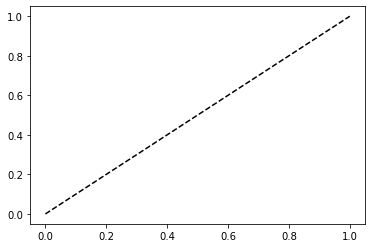

In [106]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForest classifier')

In [107]:
import joblib
joblib.dump(rfc,'winequality_rfc.obj')
winequality_rfc=joblib.load('winequality_rfc.obj')
pd.DataFrame({'Actual':y_test,'Prediction':pred})

,Actual,Prediction
2495,1,1
1207,0,0
1084,0,0
2195,1,1
1128,0,0
...,...,...
1997,1,1
1358,0,0
2638,1,1
370,0,0
